# The Real Cost of Diabetes


* Over 34 million americans have diabetes
    * 1 in 5 young adults have pre-diabetes
    
* 325 billion dollars spent annually in healthcare costs for diabetes 

* People with diabetes spend 2.3x as much in healthcare on average

# How Was the Data Collected?
https://www.kaggle.com/brandao/diabetes

* 1999-2008
* It is an inpatient encounter (a hospital admission).
* It is a diabetic encounter, that is, one during which any kind of diabetes was entered to the system as a diagnosis.
* The length of stay was at least 1 day and at most 14 days.
* Laboratory tests were performed during the encounter.
* Medications were administered during the encounter.


In [3]:
#importing libraries into python
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
from sqlalchemy import create_engine
import re
import warnings
import scipy.stats as stats
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
from sklearn import ensemble
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
import sklearn.metrics as metrics
from sklearn.metrics import accuracy_score,auc,roc_curve,f1_score,roc_auc_score, precision_score, recall_score, classification_report, confusion_matrix
from scipy.stats import chi2_contingency
from sklearn.neural_network import MLPClassifier
import warnings
warnings.filterwarnings('ignore')

In [4]:
#load dataset into python
df = pd.read_csv('diabetic_data.csv')

# Heading of Data Set

In [5]:
#gives first 5 lines of data
df.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


# Description of Features

* **Encounter ID**: Unique identifier of an encounter
* **Patient number**: Unique identifier of a patient
* **Race Values**: Caucasian, Asian, African American, Hispanic, and other
* **Gender Values**: male, female, and unknown/invalid
* **Age**: Grouped in 10-year intervals
* **Weight**: Weight in pounds
* **Admission type**: Integer identifier corresponding to 9 distinct values, for example, emergency, urgent, elective, newborn, and not available
* **Discharge disposition**: Integer identifier corresponding to 29 distinct values, for example, discharged to home, expired, and not available
* **Admission source**: Integer identifier corresponding to 21 distinct values, for example, physician referral, emergency room, and transfer from a hospital
* **Time in hospital**: Integer number of days between admission and discharge
* **Payer code**: Integer identifier corresponding to 23 distinct values, for example, Blue Cross/Blue Shield, Medicare, and self-pay Medical

* **Medical specialty**: Integer identifier of a specialty of the admitting physician, corresponding to 84 distinct values, for example, cardiology, internal medicine, family/general practice, and surgeon
* **Number of lab procedures**: Number of lab tests performed during the encounter
* **Number of procedures**: Numeric Number of procedures (other than lab tests) performed during the encounter
* **Number of medications**: Number of distinct generic names administered during the encounter
* **Number of outpatient visits**: Number of outpatient visits of the patient in the year preceding the encounter
* **Number of emergency visits**: Number of emergency visits of the patient in the year preceding the encounter
* **Number of inpatient visits**: Number of inpatient visits of the patient in the year preceding the encounter


* **Diagnosis 1**: The primary diagnosis (coded as first three digits of ICD9); 848 distinct values
* **Diagnosis 2**: Secondary diagnosis (coded as first three digits of ICD9); 923 distinct values
* **Diagnosis 3**: Additional secondary diagnosis (coded as first three digits of ICD9); 954 distinct values
* **Number of diagnoses**: Number of diagnoses entered to the system
* **Glucose serum test result**: Indicates the range of the result or if the test was not taken. Values: “>200,” “>300,” “normal,” and “none” if not measured
* **A1c test result**: Indicates the range of the result or if the test was not taken. Values: “>8” if the result was greater than 8%, “>7” if the result was greater than 7% but less than 8%, “normal” if the result was less than 7%, and “none” if not measured.
* **Change of medications**: Indicates if there was a change in diabetic medications (either dosage or generic name). Values: “change” and “no change”

* **Diabetes medications**: Indicates if there was any diabetic medication prescribed. Values: “yes” and “no”
* **24 features for medications For the generic names**: metformin, repaglinide, nateglinide, chlorpropamide, glimepiride, acetohexamide, glipizide, glyburide, tolbutamide, pioglitazone, rosiglitazone, acarbose, miglitol, troglitazone, tolazamide, examide, sitagliptin, insulin, glyburide-metformin, glipizide-metformin, glimepiride- pioglitazone, metformin-rosiglitazone, and metformin- pioglitazone, the feature indicates whether the drug was prescribed or there was a change in the dosage. Values: “up” if the dosage was increased during the encounter, “down” if the dosage was decreased, “steady” if the dosage did not change, and “no” if the drug was not prescribed
* **Readmitted Days to inpatient readmission**: “<30” if the patient was readmitted in less than 30 days, “>30” if the patient was readmitted in more than 30 days, and “No” for no record of readmission

# Data Types:

In [6]:
#gives data type of each column
df.dtypes

encounter_id                 int64
patient_nbr                  int64
race                        object
gender                      object
age                         object
weight                      object
admission_type_id            int64
discharge_disposition_id     int64
admission_source_id          int64
time_in_hospital             int64
payer_code                  object
medical_specialty           object
num_lab_procedures           int64
num_procedures               int64
num_medications              int64
number_outpatient            int64
number_emergency             int64
number_inpatient             int64
diag_1                      object
diag_2                      object
diag_3                      object
number_diagnoses             int64
max_glu_serum               object
A1Cresult                   object
metformin                   object
repaglinide                 object
nateglinide                 object
chlorpropamide              object
glimepiride         

# Data Null Count:

In [7]:
#tells how many non-null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
encounter_id                101766 non-null int64
patient_nbr                 101766 non-null int64
race                        101766 non-null object
gender                      101766 non-null object
age                         101766 non-null object
weight                      101766 non-null object
admission_type_id           101766 non-null int64
discharge_disposition_id    101766 non-null int64
admission_source_id         101766 non-null int64
time_in_hospital            101766 non-null int64
payer_code                  101766 non-null object
medical_specialty           101766 non-null object
num_lab_procedures          101766 non-null int64
num_procedures              101766 non-null int64
num_medications             101766 non-null int64
number_outpatient           101766 non-null int64
number_emergency            101766 non-null int64
number_inpatient            10176

# Data Unique Value Counts:

In [8]:
#gives unique value counts for each column
df.nunique()

encounter_id                101766
patient_nbr                  71518
race                             6
gender                           3
age                             10
weight                          10
admission_type_id                8
discharge_disposition_id        26
admission_source_id             17
time_in_hospital                14
payer_code                      18
medical_specialty               73
num_lab_procedures             118
num_procedures                   7
num_medications                 75
number_outpatient               39
number_emergency                33
number_inpatient                21
diag_1                         717
diag_2                         749
diag_3                         790
number_diagnoses                16
max_glu_serum                    4
A1Cresult                        4
metformin                        4
repaglinide                      4
nateglinide                      4
chlorpropamide                   4
glimepiride         

In [9]:
#all the missing values in the data set are question marks. Replaces all ? with null values
df.replace('?', np.nan,inplace=True)
df.replace('Unknown/Invalid', np.nan,inplace=True)

# Percent Missing Data: 

In [10]:
df.isnull().sum()*100/df.isnull().count()

encounter_id                 0.000000
patient_nbr                  0.000000
race                         2.233555
gender                       0.002948
age                          0.000000
weight                      96.858479
admission_type_id            0.000000
discharge_disposition_id     0.000000
admission_source_id          0.000000
time_in_hospital             0.000000
payer_code                  39.557416
medical_specialty           49.082208
num_lab_procedures           0.000000
num_procedures               0.000000
num_medications              0.000000
number_outpatient            0.000000
number_emergency             0.000000
number_inpatient             0.000000
diag_1                       0.020636
diag_2                       0.351787
diag_3                       1.398306
number_diagnoses             0.000000
max_glu_serum                0.000000
A1Cresult                    0.000000
metformin                    0.000000
repaglinide                  0.000000
nateglinide 

In [11]:
#dropping columns that are 'ID' 
df = df.drop(['encounter_id', 'patient_nbr','admission_type_id', 'discharge_disposition_id',
         'admission_source_id'], axis=1)

#dropping columns that have high number of missing data
df = df.drop(['weight', 'payer_code', 'medical_specialty'], axis=1)

#drop rows with null values
df = df.dropna(axis=0)


In [12]:
#data clean for diagnosis codes

#creating diabetes primary feature
diagnosis_col = ['diag_1', 'diag_2', 'diag_3']
for col in diagnosis_col:
    df[col] = df[col].str.replace('E', '')
    df[col] = df[col].str.replace('V', '')
    df.loc[df[col].str.contains('250'), col] = '250'

#turning diagnosis columns from integer into general diagnosis
for col in diagnosis_col:
    df.loc[df[col] == '250', col] = 'Diabetes'
    df.loc[((df[col] >= '390') & (df[col] <= '459')) | (df[col] == '785'), col] = 'Circulatory'
    df.loc[((df[col] >= '460') & (df[col] <= '519')) | (df[col] == '786'), col] = 'Respiratory'
    df.loc[((df[col] >= '520') & (df[col] <= '579')) | (df[col] == '787'), col] = 'Digestive'
    df.loc[((df[col] >= '800') & (df[col] <= '999')), col] = 'Injury/Poison'
    df.loc[((df[col] >= '710') & (df[col] <= '739')), col] = 'Musculoskeletal'
    df.loc[((df[col] >= '580') & (df[col] <= '629')) | (df[col] == '788'), col] = 'Genitourinary'
    df.loc[((df[col] >= '140') & (df[col] <= '239')), col] = 'Neoplasm'
    df[col] = df[col].where(df[col].str.isalpha(), 'Other')

In [13]:
#Will only be keeping insulin. all other medications are too skewed/dont occur enough
medication_list = ['metformin', 'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride', 
                   'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide', 'pioglitazone', 'rosiglitazone',
                   'acarbose', 'miglitol', 'troglitazone', 'tolazamide', 'examide', 'citoglipton', 'insulin',
                   'glyburide-metformin', 'glipizide-metformin', 'glimepiride-pioglitazone',
                   'metformin-rosiglitazone', 'metformin-pioglitazone']

#creates a feature that combines how long a patient has stayed in the hospital previously
df['time_in_hospital_past'] = df['number_inpatient'] + df['number_emergency'] + df['number_outpatient']
med_vals = ['Steady', 'Up', 'Down']

#creates a feature that shows how many diabetes medication the patient is on
df['number_diabetes_meds'] = np.nan
for i in range(len(df)):
    num = 0
    for med in medication_list:
        if df[med].iloc[i] in med_vals:
            num += 1
    df['number_diabetes_meds'].iloc[i] = num

In [14]:
#data cleaning
df.loc[df['readmitted'] == '>30', 'readmitted'] = 'Yes'
df.loc[df['readmitted'] == '<30', 'readmitted'] = 'Yes'
df.loc[df['A1Cresult'] == '>8', 'A1Cresult'] = 'Taken'
df.loc[df['A1Cresult'] == '>7', 'A1Cresult'] = 'Taken'
df.loc[df['A1Cresult'] == 'Norm', 'A1Cresult'] = 'Taken'
df.loc[df['A1Cresult'] == 'None', 'A1Cresult'] = 'Not Taken'
df.loc[df['change'] == 'Ch', 'change'] = 'yes'
df.loc[df['age'] == '[0-10)', 'age'] = '0-29'
df.loc[df['age'] == '[10-20)', 'age'] = '0-29'
df.loc[df['age'] == '[20-30)', 'age'] = '0-29'
df.loc[df['age'] == '[30-40)', 'age'] = '30-59'
df.loc[df['age'] == '[40-50)', 'age'] = '30-59'
df.loc[df['age'] == '[50-60)', 'age'] = '30-59'
df.loc[df['age'] == '[60-70)', 'age'] = '60-99'
df.loc[df['age'] == '[70-80)', 'age'] = '60-99'
df.loc[df['age'] == '[80-90)', 'age'] = '60-99'
df.loc[df['age'] == '[90-100)', 'age'] = '60-99'


numeric_data = df.select_dtypes(include=[np.number])
categorical_data = df.select_dtypes(exclude=[np.number])

# Histogram of Features

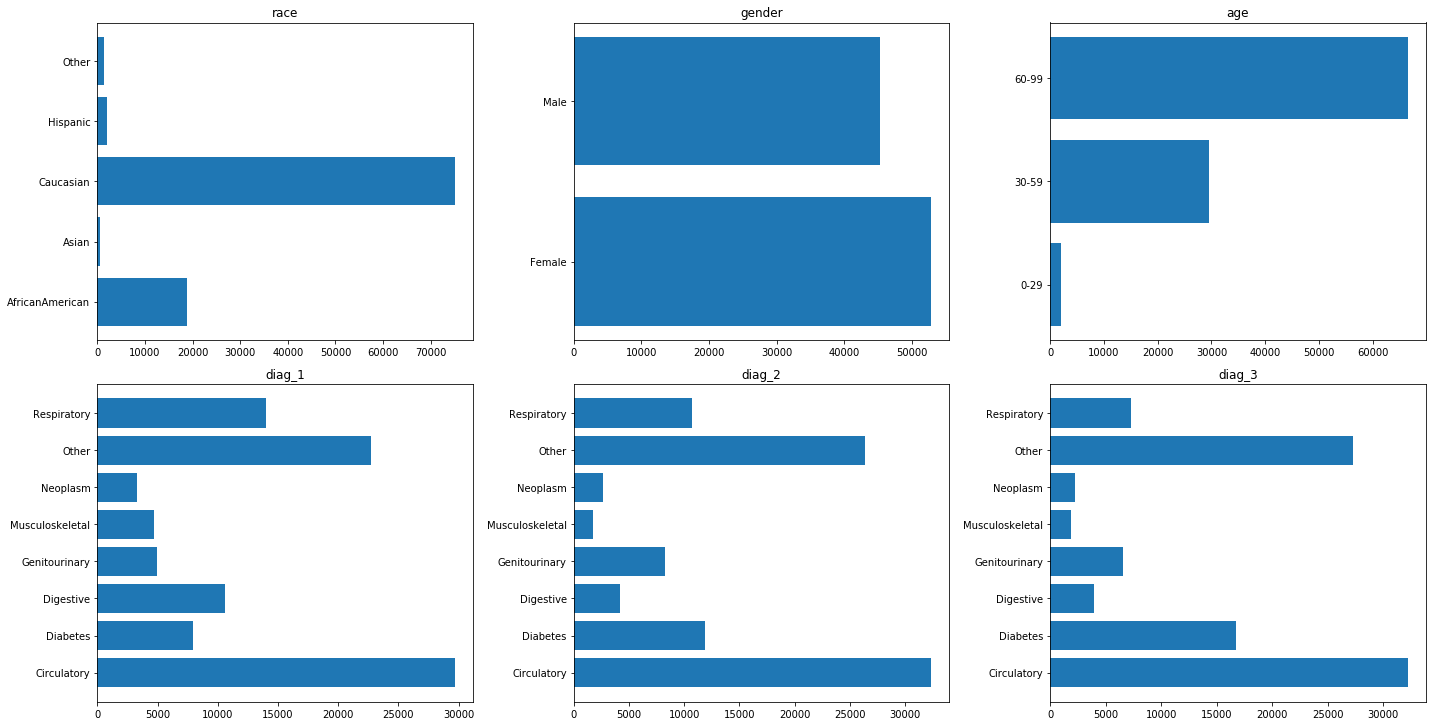

In [15]:
#horizontal bar graphs of each categorical variable
plt.figure(figsize=(20,20))
i=1
for col in categorical_data.columns[0:6]:
    plt.subplot(4,3,i)
    plt.barh(df.groupby(col)[col].count().index, df.groupby(col)[col].count())
    plt.title(col)
    i = i + 1

plt.tight_layout()
plt.show()

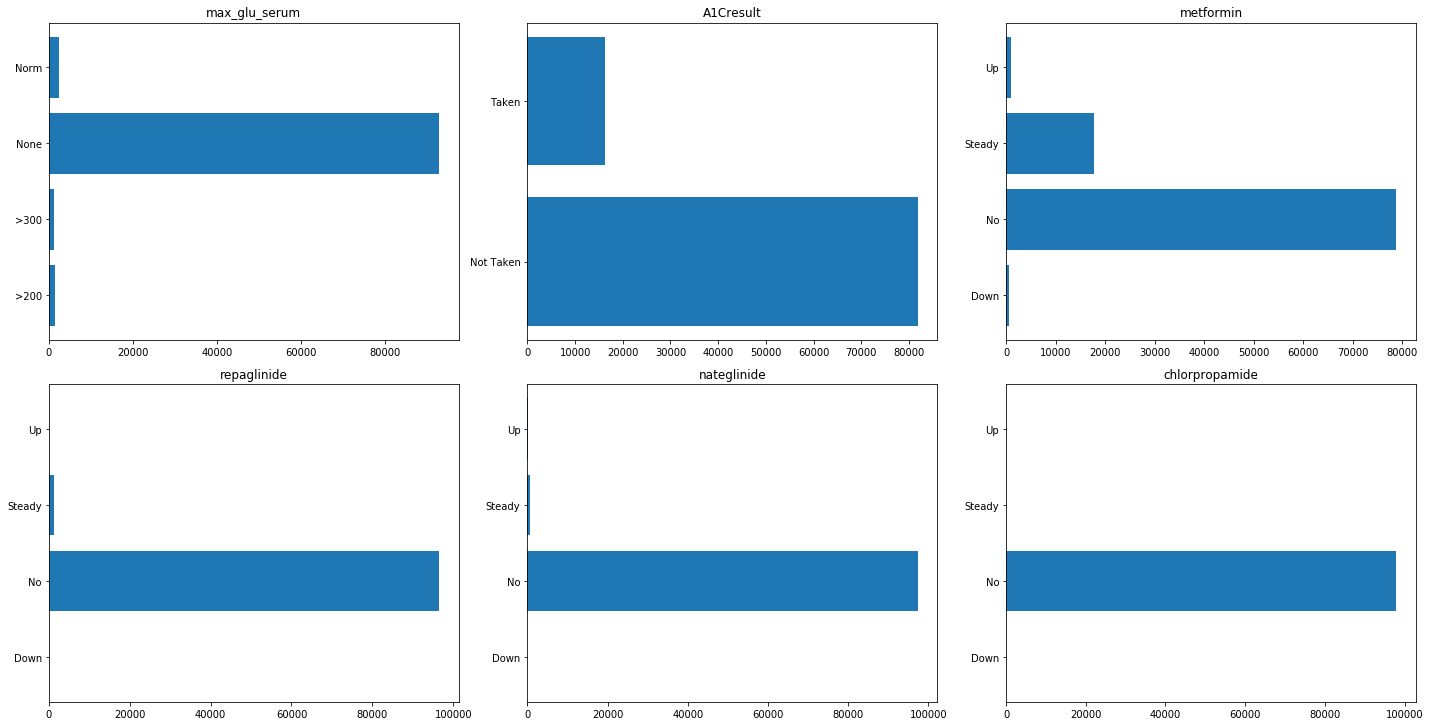

In [16]:
#horizontal bar graphs of each categorical variable
plt.figure(figsize=(20,20))
i=1
for col in categorical_data.columns[6:12]:
    plt.subplot(4,3,i)
    plt.barh(df.groupby(col)[col].count().index, df.groupby(col)[col].count())
    plt.title(col)
    i = i + 1

plt.tight_layout()
plt.show()

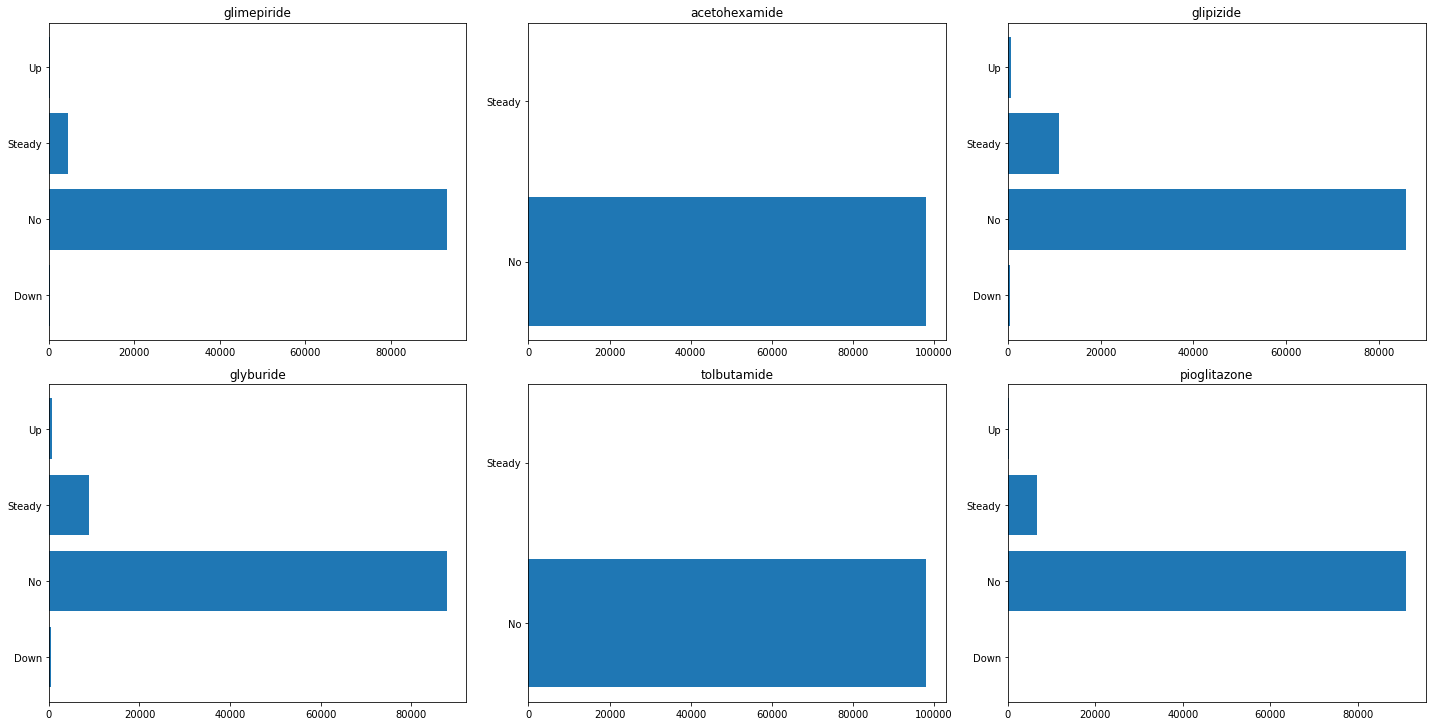

In [17]:
#horizontal bar graphs of each categorical variable
plt.figure(figsize=(20,20))
i=1
for col in categorical_data.columns[12:18]:
    plt.subplot(4,3,i)
    plt.barh(df.groupby(col)[col].count().index, df.groupby(col)[col].count())
    plt.title(col)
    i = i + 1

plt.tight_layout()
plt.show()

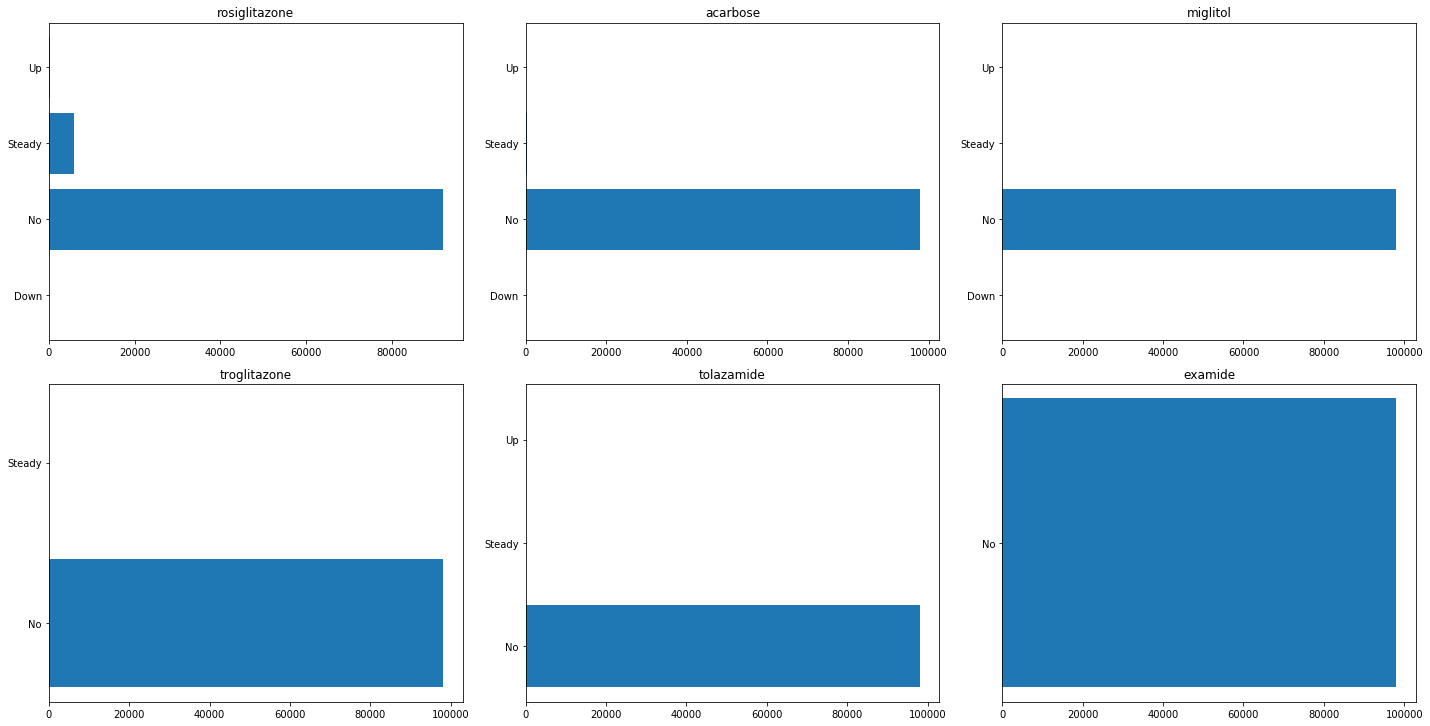

In [18]:
#horizontal bar graphs of each categorical variable
plt.figure(figsize=(20,20))
i=1
for col in categorical_data.columns[18:24]:
    plt.subplot(4,3,i)
    plt.barh(df.groupby(col)[col].count().index, df.groupby(col)[col].count())
    plt.title(col)
    i = i + 1

plt.tight_layout()
plt.show()

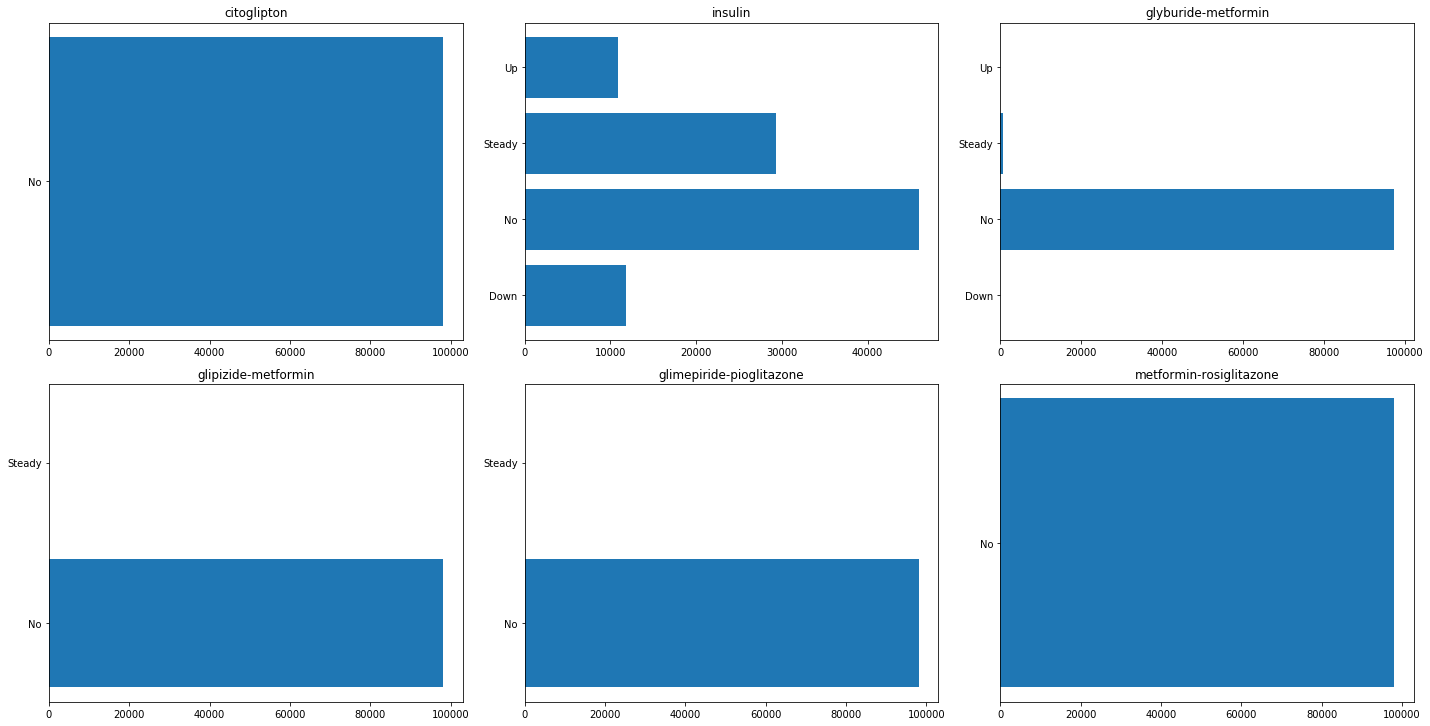

In [19]:
#horizontal bar graphs of each categorical variable
plt.figure(figsize=(20,20))
i=1
for col in categorical_data.columns[24:30]:
    plt.subplot(4,3,i)
    plt.barh(df.groupby(col)[col].count().index, df.groupby(col)[col].count())
    plt.title(col)
    i = i + 1

plt.tight_layout()
plt.show()

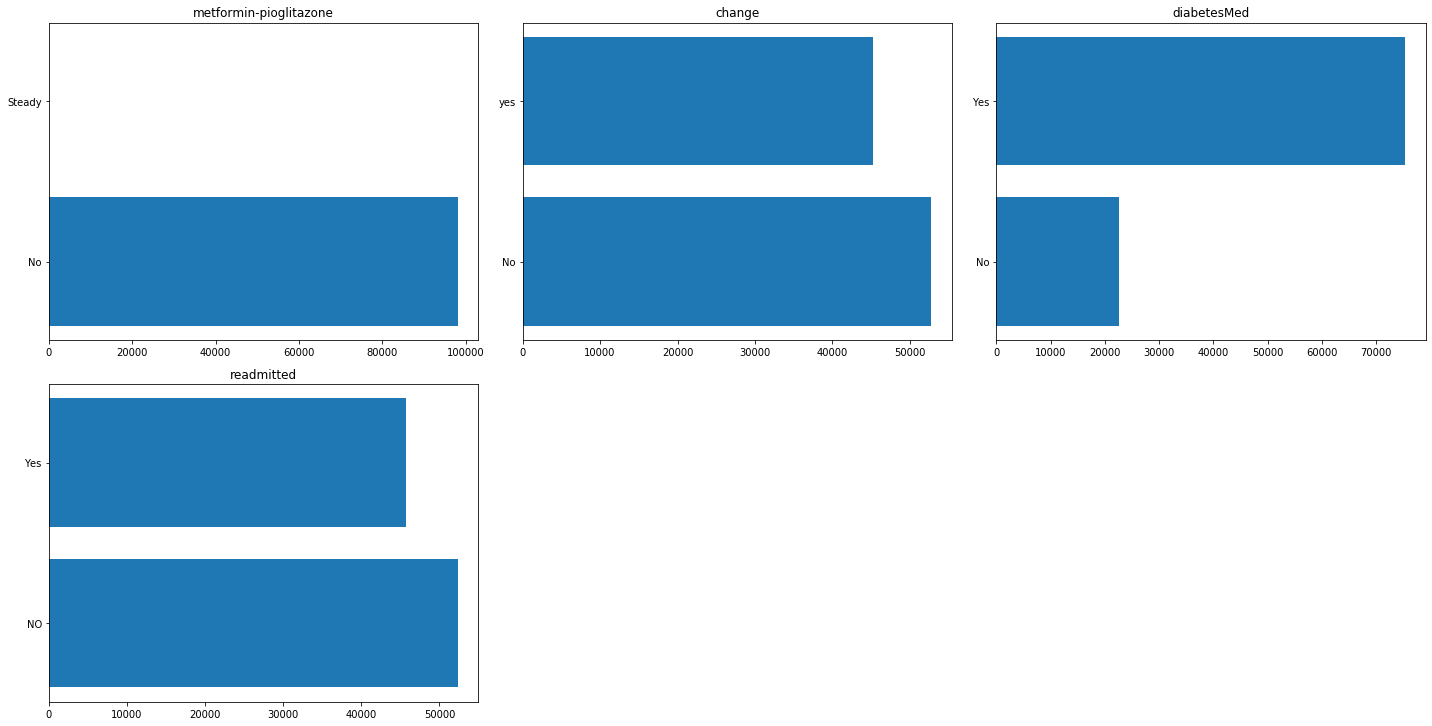

In [20]:
#horizontal bar graphs of each categorical variable
plt.figure(figsize=(20,20))
i=1
for col in categorical_data.columns[30:36]:
    plt.subplot(4,3,i)
    plt.barh(df.groupby(col)[col].count().index, df.groupby(col)[col].count())
    plt.title(col)
    i = i + 1

plt.tight_layout()
plt.show()

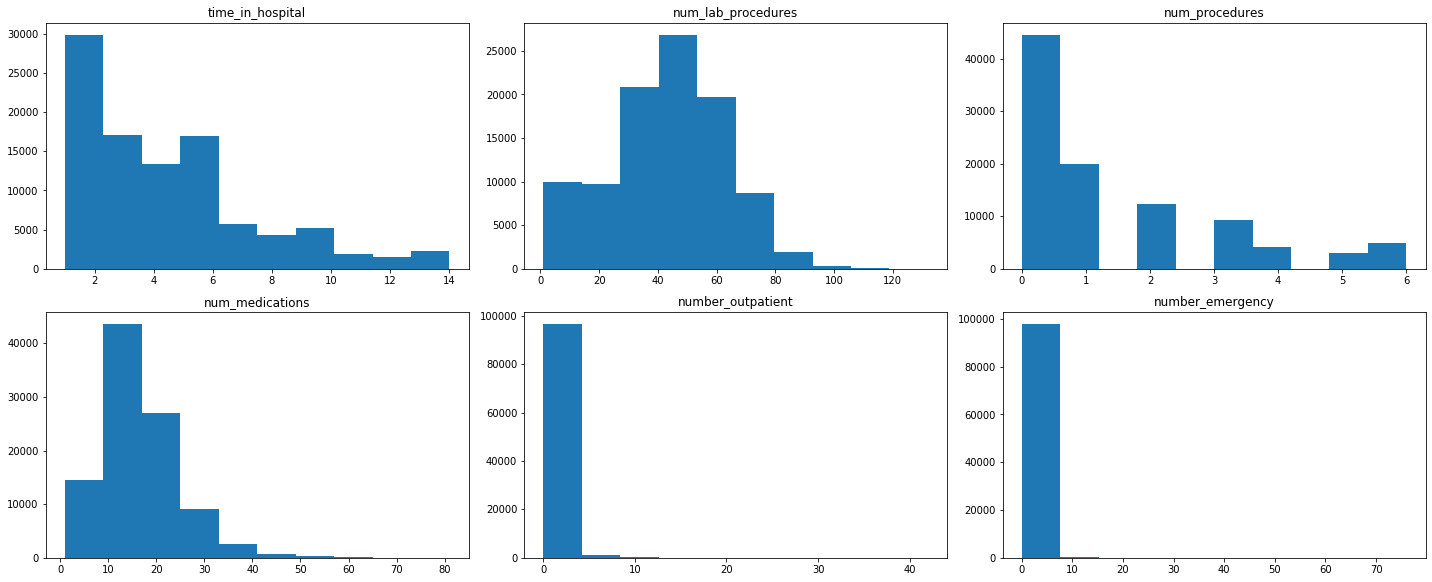

In [21]:
i = 1
plt.figure(figsize=(20,20))
for column_name in numeric_data.columns[0:6]:
    plt.subplot(5,3,i)
    plt.hist(df[column_name])
    plt.title(column_name)
    i = i+1
    
plt.tight_layout()
plt.show()

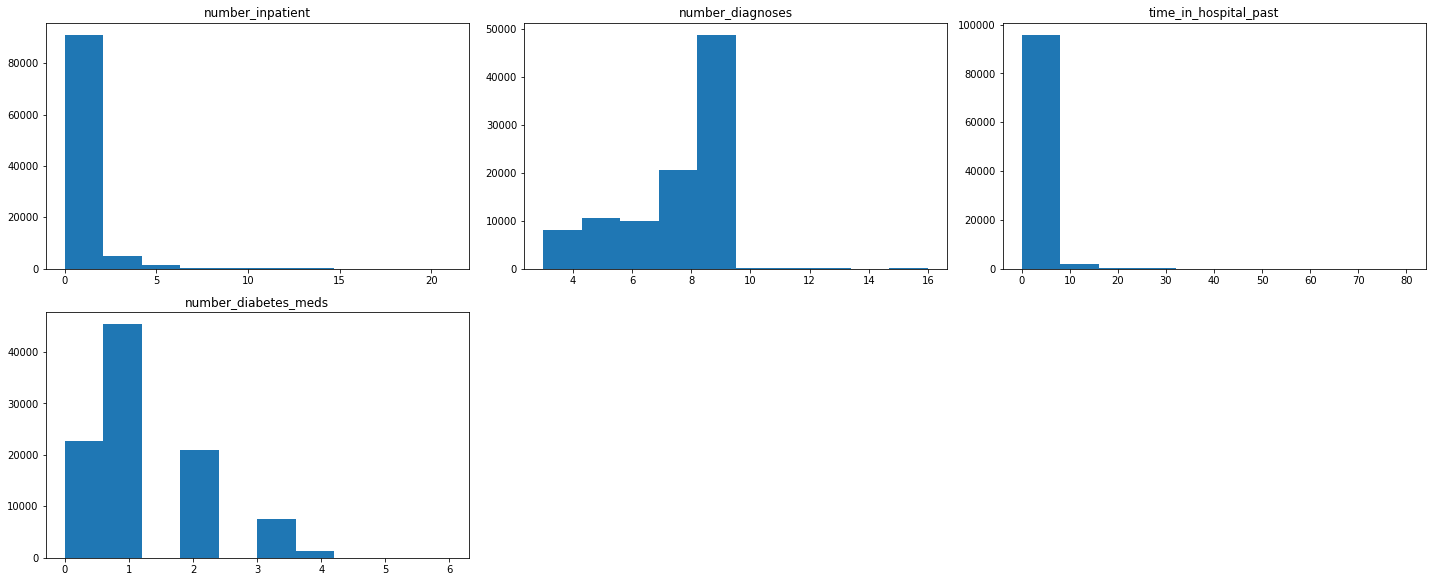

In [22]:
i = 1
plt.figure(figsize=(20,20))
for column_name in numeric_data.columns[6:]:
    plt.subplot(5,3,i)
    plt.hist(df[column_name])
    plt.title(column_name)
    i = i+1
    
plt.tight_layout()
plt.show()

# Boxplot of Features

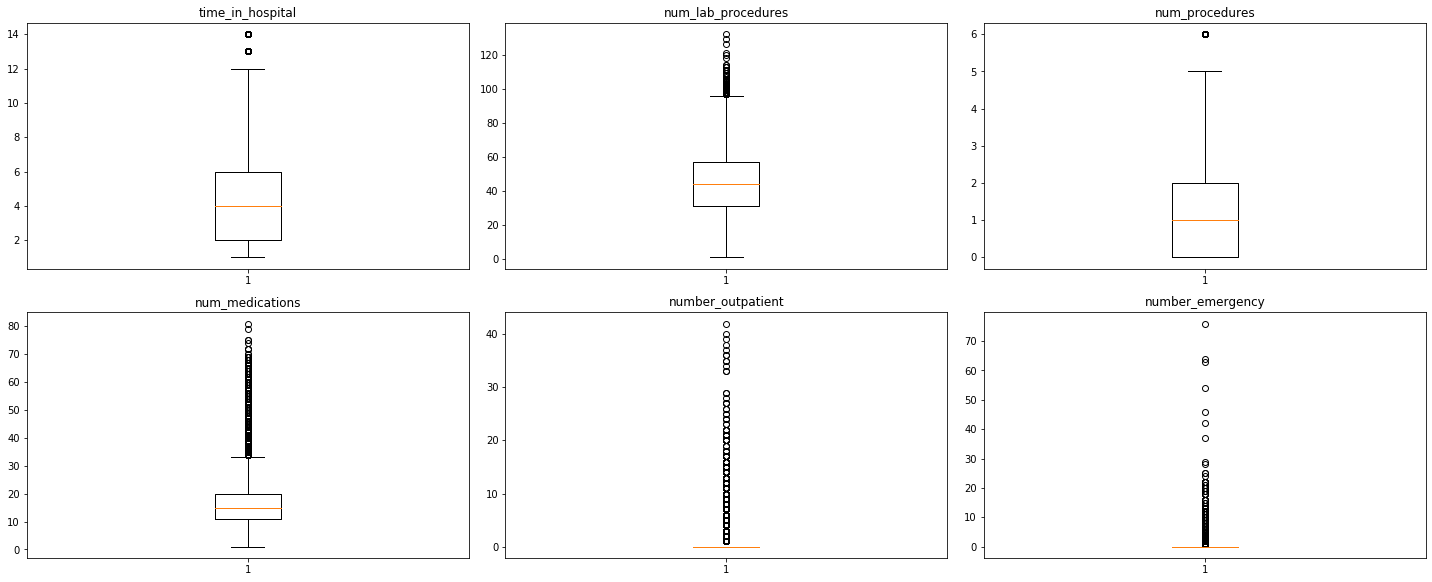

In [23]:
i = 1
plt.figure(figsize=(20,20))
for column_name in numeric_data.columns[0:6]:
    plt.subplot(5,3,i)
    plt.boxplot(df[column_name])
    plt.title(column_name)
    i = i+1
    
plt.tight_layout()
plt.show()

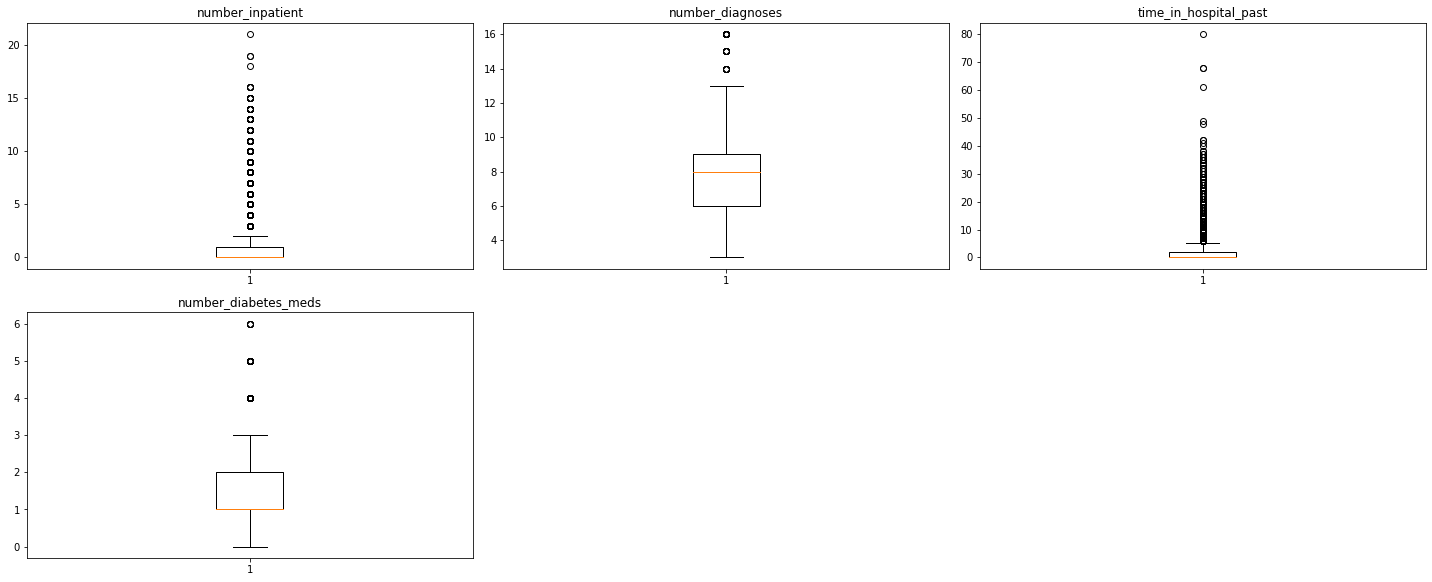

In [24]:
i = 1
plt.figure(figsize=(20,20))
for column_name in numeric_data.columns[6:]:
    plt.subplot(5,3,i)
    plt.boxplot(df[column_name])
    plt.title(column_name)
    i = i+1
    
plt.tight_layout()
plt.show()

In [25]:
for col in df.columns:
    count_table = pd.crosstab(df[col], df['readmitted'])
    print('\nCross tab of ' + col + ' and readmitted\n')
    print(count_table)


Cross tab of race and readmitted

readmitted          NO    Yes
race                         
AfricanAmerican  10198   8683
Asian              401    224
Caucasian        39693  35386
Hispanic          1144    840
Other              901    582

Cross tab of gender and readmitted

readmitted     NO    Yes
gender                  
Female      27771  25062
Male        24566  20653

Cross tab of age and readmitted

readmitted     NO    Yes
age                     
0-29         1127    882
30-59       16329  13181
60-99       34881  31652

Cross tab of time_in_hospital and readmitted

readmitted          NO   Yes
time_in_hospital            
1                 8051  5438
2                 9046  7395
3                 9281  7768
4                 6904  6530
5                 5007  4692
6                 3702  3618
7                 2877  2817
8                 2102  2174
9                 1449  1479
10                1135  1152
11                 934   875
12                 718   706
13    


Cross tab of glyburide and readmitted

readmitted     NO    Yes
glyburide               
Down          273    265
No          46805  40986
Steady       4824   4108
Up            435    356

Cross tab of tolbutamide and readmitted

readmitted      NO    Yes
tolbutamide              
No           52322  45708
Steady          15      7

Cross tab of pioglitazone and readmitted

readmitted       NO    Yes
pioglitazone              
Down             54     61
No            48700  42255
Steady         3474   3281
Up              109    118

Cross tab of rosiglitazone and readmitted

readmitted        NO    Yes
rosiglitazone              
Down              57     27
No             49182  42704
Steady          2994   2914
Up               104     70

Cross tab of acarbose and readmitted

readmitted     NO    Yes
acarbose                
Down            1      2
No          52217  45536
Steady        115    171
Up              4      6

Cross tab of miglitol and readmitted

readmitted     NO  

In [26]:
for col in df.columns:
    count_table = pd.crosstab(df[col], df['readmitted'])
    print('\nChi-Square Test Results between ' + col + ' and readmitted:')
    print(stats.chisquare(count_table, axis=None))


Chi-Square Test Results between race and readmitted:
Power_divergenceResult(statistic=208976.18667645738, pvalue=0.0)

Chi-Square Test Results between gender and readmitted:
Power_divergenceResult(statistic=1053.2523150981112, pvalue=5.044101001802032e-228)

Chi-Square Test Results between age and readmitted:
Power_divergenceResult(statistic=64777.293844082735, pvalue=0.0)

Chi-Square Test Results between time_in_hospital and readmitted:
Power_divergenceResult(statistic=66918.61314404603, pvalue=0.0)

Chi-Square Test Results between num_lab_procedures and readmitted:
Power_divergenceResult(statistic=85105.34908007996, pvalue=0.0)

Chi-Square Test Results between num_procedures and readmitted:
Power_divergenceResult(statistic=93413.11626483906, pvalue=0.0)

Chi-Square Test Results between num_medications and readmitted:
Power_divergenceResult(statistic=202418.45649247337, pvalue=0.0)

Chi-Square Test Results between number_outpatient and readmitted:
Power_divergenceResult(statistic=262

# Data Cleaning/Feature Engineering
#### 1) Removed Identification features
#### 2) Removed data with high number of missing values
#### 3) Changed diagnosis codes to a general diagnosis
#### 4) Created new features: time in hospital past and number diabetes meds
#### 5) Binned age feature
#### 6) Changed select features to binary

# Features Dropped

* All medications except for insulin
* diabetes med
* secondary and teriary diagnoses
* days spent in inpatient/outpatient/emergency
* maximum glucose serum       
* age
* race

In [27]:
#drops all medcations except insulin. and other     
df = df.drop(['metformin', 'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride', 
              'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide', 'pioglitazone', 'rosiglitazone',
              'acarbose', 'miglitol', 'troglitazone', 'tolazamide', 'examide', 'citoglipton',
              'glyburide-metformin', 'glipizide-metformin','glimepiride-pioglitazone',
              'metformin-rosiglitazone', 'metformin-pioglitazone','diag_2', 'diag_3', 'max_glu_serum', 
              'race','diabetesMed','number_inpatient', 'number_outpatient', 'number_emergency','age'], axis=1)



# Description of Final Features Used

In [28]:
df.describe()

,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_diagnoses,time_in_hospital_past,number_diabetes_meds
count,98052.000000,98052.000000,98052.000000,98052.000000,98052.000000,98052.000000,98052.000000
mean,4.422011,43.148462,1.350712,16.119590,7.512096,1.225717,1.178242
std,2.993070,19.711757,1.708475,8.108496,1.832472,2.314742,0.921825
min,1.000000,1.000000,0.000000,1.000000,3.000000,0.000000,0.000000
25%,2.000000,31.000000,0.000000,11.000000,6.000000,0.000000,1.000000
50%,4.000000,44.000000,1.000000,15.000000,8.000000,0.000000,1.000000
75%,6.000000,57.000000,2.000000,20.000000,9.000000,2.000000,2.000000
max,14.000000,132.000000,6.000000,81.000000,16.000000,80.000000,6.000000


# Countplot of Final Features with Readmittance

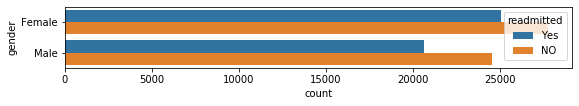

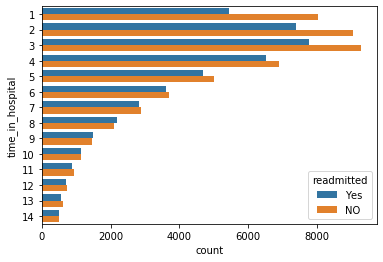

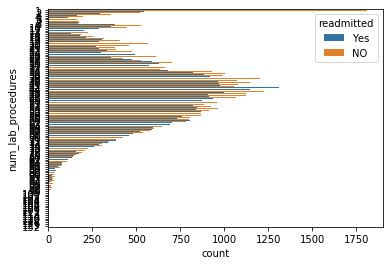

In [29]:
fig = plt.figure(figsize=(20,20))
i=1
for col in df.columns[0:3]:
    fig.add_subplot(15,2,i)
    sns.countplot(y=col, hue='readmitted', data=df)
    i=i+1
    plt.show()


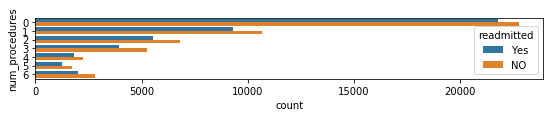

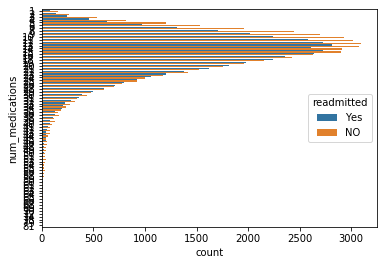

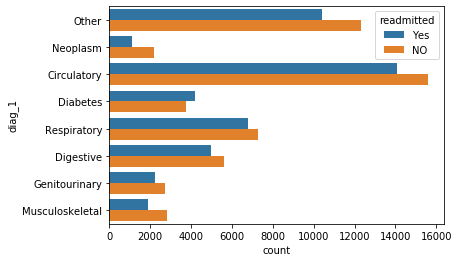

In [30]:
fig = plt.figure(figsize=(20,20))
i=1
for col in df.columns[3:6]:
    fig.add_subplot(15,2,i)
    sns.countplot(y=col, hue='readmitted', data=df)
    i=i+1
    plt.show()


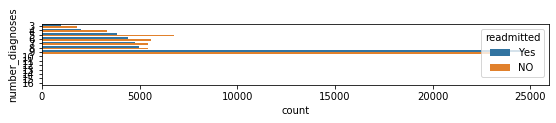

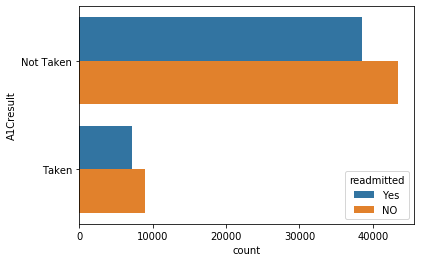

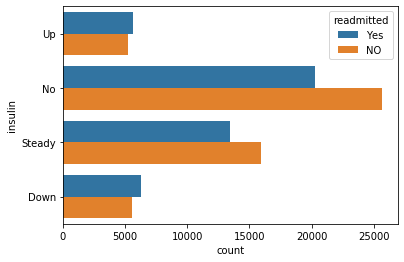

In [31]:
fig = plt.figure(figsize=(20,20))
i=1
for col in df.columns[6:9]:
    fig.add_subplot(15,2,i)
    sns.countplot(y=col, hue='readmitted', data=df)
    i=i+1
    plt.show()


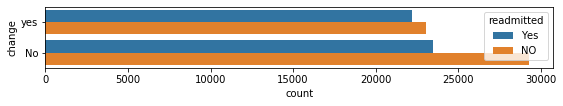

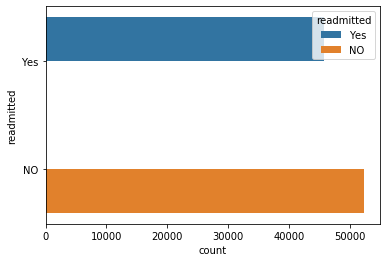

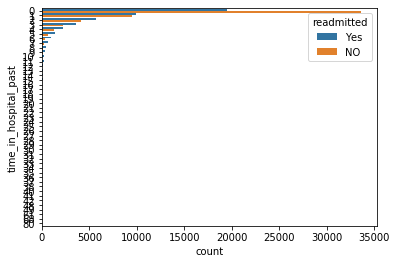

In [32]:
fig = plt.figure(figsize=(20,20))
i=1
for col in df.columns[9:12]:
    fig.add_subplot(15,2,i)
    sns.countplot(y=col, hue='readmitted', data=df)
    i=i+1
    plt.show()


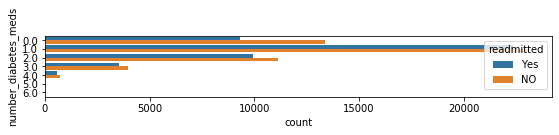

In [33]:
fig = plt.figure(figsize=(20,20))
i=1
for col in df.columns[12:]:
    fig.add_subplot(15,2,i)
    sns.countplot(y=col, hue='readmitted', data=df)
    i=i+1
    plt.show()


# Collinearity of Features

### Chi-square test p-values are all < .05

Text(0.5, 1, 'Correlation matrix')

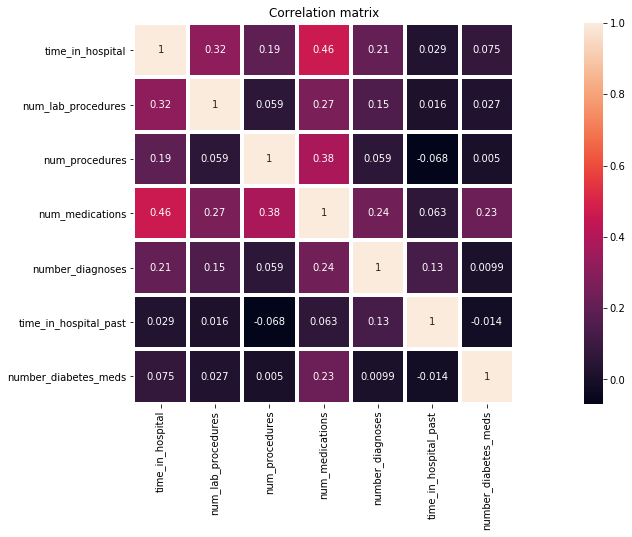

In [82]:
plt.figure(figsize=(25,7))
sns.heatmap(df.corr(), square=True, annot=True, linewidths=3)
b, t = plt.ylim()
b += 0.5
t -= 0.5
plt.ylim(b, t)
plt.title('Correlation matrix')

In [35]:
col_to_dummy = ['gender','change','insulin','A1Cresult','diag_1']

numeric_features = ['num_lab_procedures','number_diabetes_meds','time_in_hospital_past',
              'time_in_hospital', 'num_procedures', 'num_medications',
              'number_diagnoses']

final_df = df.copy()

final_df = pd.concat([df, pd.get_dummies(df[col_to_dummy], drop_first=True)], axis=1)
final_df = final_df.drop(col_to_dummy, axis=1)
y = final_df.readmitted
x = final_df.drop('readmitted', axis=1)

# Data Preprocessing

## Get Dummies for categorical features

## Standard scaler for numerical features

In [36]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=30)

minmax=MinMaxScaler()
scaler = StandardScaler()

#scaler.fit(x_train[numeric_features])
#minmax.fit(x_train[numeric_features])

x_train[numeric_features] = scaler.fit_transform(x_train[numeric_features])
x_test[numeric_features] = scaler.transform(x_test[numeric_features])

#x_train_mm[numeric_features] = minmax.fit_transform(x_train[numeric_features])
#x_test_mm[numeric_features] = minmax.transform(x_test[numeric_features])

In [37]:
x_train

,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_diagnoses,time_in_hospital_past,number_diabetes_meds,gender_Male,change_yes,insulin_No,insulin_Steady,insulin_Up,A1Cresult_Taken,diag_1_Diabetes,diag_1_Digestive,diag_1_Genitourinary,diag_1_Musculoskeletal,diag_1_Neoplasm,diag_1_Other,diag_1_Respiratory
47923,1.526392,0.245260,0.964392,1.828795,0.811208,-0.097721,-0.192540,1,0,0,1,0,0,0,0,0,0,1,0,0
84592,0.525873,-0.109684,-0.790196,-0.508364,0.811208,-0.526861,0.892447,1,1,0,1,0,0,0,0,1,0,0,0,0
20292,1.526392,1.766453,-0.790196,0.475703,0.811208,-0.526861,-0.192540,0,0,0,1,0,1,0,0,0,0,0,0,0
21604,1.526392,0.143848,2.718980,1.213753,0.811208,-0.526861,-0.192540,0,0,1,0,0,0,0,0,0,0,0,0,0
73936,-0.141139,0.904444,-0.790196,-0.262348,0.811208,4.193680,-0.192540,1,1,0,0,1,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69053,0.859380,0.093141,-0.790196,-0.262348,0.811208,0.331420,-0.192540,0,1,0,0,0,0,0,0,0,0,0,1,0
48532,-0.808151,0.245260,2.134117,0.844728,0.811208,-0.526861,0.892447,1,1,0,1,0,1,0,0,0,0,0,0,1
50377,-0.808151,-1.985822,-0.790196,-0.385356,0.811208,-0.526861,-1.277526,0,0,1,0,0,0,0,0,0,0,0,0,1
72724,-0.141139,0.448086,1.549254,1.459770,0.811208,-0.097721,-1.277526,0,0,1,0,0,1,0,0,0,0,0,0,1


# KNN Model

## Accuracy Score: 

In [38]:
neighbors = KNeighborsClassifier(n_neighbors=5)

neighbors.fit(x_train, y_train)


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [39]:
neighbors.score(x_test,y_test)

0.5608077099586967

# KNN Model (Weighted)

In [40]:
neighbors_weighted = KNeighborsClassifier(n_neighbors=313, weights = 'distance')

neighbors_weighted.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=313, p=2,
                     weights='distance')

## Accuracy Score:

In [41]:
neighbors_weighted.score(x_test,y_test)

0.6093009025546887

# Support Vector Classifier Model

## Accuracy Score:

In [42]:
svm = SVC()
svm.fit(x_train, y_train)
svm.score(x_test, y_test)

0.621487940441589

## Cross-validation Score:

In [43]:
cross_val_score(svm,x,y,cv=5)

array([0.58043955, 0.5969099 , 0.58021418, 0.61346252, 0.61922489])

## SVC Accuracy Report:

In [44]:
y_pred_svm = svm.predict(x_test)
print("Accuracy is {0:.2f}".format(accuracy_score(y_test, y_pred_svm)))
print(classification_report(y_test, y_pred_svm))

Accuracy is 0.62
              precision    recall  f1-score   support

          NO       0.62      0.74      0.68     10510
         Yes       0.62      0.49      0.55      9101

    accuracy                           0.62     19611
   macro avg       0.62      0.61      0.61     19611
weighted avg       0.62      0.62      0.62     19611



# Gradient Boosting Model

## Accuracy Score:

In [45]:
#boosted classifier
params = {'n_estimators': 100}

# Initialize and fit the model.
clf = ensemble.GradientBoostingClassifier(**params)
clf.fit(x_train, y_train)
clf.score(x_train, y_train)

0.6218559171861654

## Cross-validation Score:

In [46]:
cross_val_score(clf,x,y,cv=5)

array([0.61047371, 0.61526694, 0.60015298, 0.62442631, 0.627231  ])

In [47]:
feature_importances = pd.DataFrame(clf.feature_importances_,
                                   index = x_train.columns,
                                    columns=['importance']).sort_values('importance', ascending=False)
print(feature_importances)

                        importance
time_in_hospital_past     0.696386
number_diagnoses          0.061448
num_medications           0.045018
num_lab_procedures        0.039486
num_procedures            0.034691
number_diabetes_meds      0.034159
time_in_hospital          0.029679
diag_1_Neoplasm           0.018953
diag_1_Diabetes           0.013299
insulin_Steady            0.008808
diag_1_Other              0.004918
A1Cresult_Taken           0.003483
diag_1_Genitourinary      0.002840
diag_1_Respiratory        0.002095
diag_1_Musculoskeletal    0.001972
gender_Male               0.001896
diag_1_Digestive          0.000476
insulin_No                0.000262
insulin_Up                0.000130
change_yes                0.000000


## Gradient Boosting Accuracy Report:

In [48]:
y_pred_clf = clf.predict(x_test)
print("Accuracy is {0:.2f}".format(accuracy_score(y_test, y_pred_clf)))
print(classification_report(y_test, y_pred_clf))


Accuracy is 0.62
              precision    recall  f1-score   support

          NO       0.63      0.73      0.67     10510
         Yes       0.61      0.50      0.55      9101

    accuracy                           0.62     19611
   macro avg       0.62      0.61      0.61     19611
weighted avg       0.62      0.62      0.62     19611



# Random Forest Classifier

## Accuracy Score:

In [49]:
#random forest classifier
rfc = ensemble.RandomForestClassifier(n_estimators=300)
rfc.fit(x_train, y_train)
rfc.score(x_test,y_test)

0.6002753556677375

## Cross-validation Score:

In [50]:
cross_val_score(rfc,x,y,cv=5)

array([0.58533476, 0.59767477, 0.58072412, 0.59377868, 0.59490056])

## Random Forest Classifier Feature Importance:

In [51]:
feature_importances = pd.DataFrame(rfc.feature_importances_,
                                   index = x_train.columns,
                                    columns=['importance']).sort_values('importance', ascending=False)
print(feature_importances)

                        importance
num_lab_procedures        0.243991
num_medications           0.188414
time_in_hospital          0.126299
time_in_hospital_past     0.085010
number_diagnoses          0.071344
num_procedures            0.068100
number_diabetes_meds      0.040701
gender_Male               0.030529
diag_1_Other              0.019804
A1Cresult_Taken           0.019236
diag_1_Respiratory        0.015586
diag_1_Digestive          0.014450
change_yes                0.012070
insulin_No                0.011595
insulin_Steady            0.011535
diag_1_Genitourinary      0.009720
insulin_Up                0.009654
diag_1_Diabetes           0.009179
diag_1_Musculoskeletal    0.007390
diag_1_Neoplasm           0.005393


## Random Forest Classifier Accuracy Report:

In [52]:
y_pred_rfc = rfc.predict(x_test)
print("Accuracy is {0:.2f}".format(accuracy_score(y_test, y_pred_rfc)))
print(classification_report(y_test, y_pred_rfc))


Accuracy is 0.60
              precision    recall  f1-score   support

          NO       0.62      0.66      0.64     10510
         Yes       0.57      0.53      0.55      9101

    accuracy                           0.60     19611
   macro avg       0.60      0.60      0.60     19611
weighted avg       0.60      0.60      0.60     19611



# Multi-layer Perceptron Classifier

In [54]:
mlp = MLPClassifier(hidden_layer_sizes=(1000,1000,1000), early_stopping=True,verbose=True,learning_rate='adaptive')
mlp.fit(x_train, y_train)

Iteration 1, loss = 0.65842655
Validation score: 0.615424
Iteration 2, loss = 0.65244584
Validation score: 0.614914
Iteration 3, loss = 0.65130510
Validation score: 0.618993
Iteration 4, loss = 0.64979713
Validation score: 0.619120
Iteration 5, loss = 0.64781951
Validation score: 0.617718
Iteration 6, loss = 0.64706572
Validation score: 0.614914
Iteration 7, loss = 0.64535352
Validation score: 0.611727
Iteration 8, loss = 0.64323509
Validation score: 0.613512
Iteration 9, loss = 0.64151692
Validation score: 0.613639
Iteration 10, loss = 0.63916286
Validation score: 0.611600
Iteration 11, loss = 0.63575718
Validation score: 0.607776
Iteration 12, loss = 0.63266133
Validation score: 0.611472
Iteration 13, loss = 0.62834144
Validation score: 0.607138
Iteration 14, loss = 0.62223466
Validation score: 0.600510
Iteration 15, loss = 0.61547738
Validation score: 0.601530
Validation score did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.


MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=True, epsilon=1e-08,
              hidden_layer_sizes=(1000, 1000, 1000), learning_rate='adaptive',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=True,
              warm_start=False)

## Accuracy Score:

In [55]:
mlp.score(x_test, y_test)

0.6224567844577024

## Cross-validation Score

In [56]:
cross_val_score(mlp,x,y,cv=5)

Iteration 1, loss = 0.70730273
Validation score: 0.611727
Iteration 2, loss = 0.65878920
Validation score: 0.618866
Iteration 3, loss = 0.65545693
Validation score: 0.617336
Iteration 4, loss = 0.65410216
Validation score: 0.619758
Iteration 5, loss = 0.65322535
Validation score: 0.624729
Iteration 6, loss = 0.65313689
Validation score: 0.622180
Iteration 7, loss = 0.65274686
Validation score: 0.620650
Iteration 8, loss = 0.65168722
Validation score: 0.613257
Iteration 9, loss = 0.65181317
Validation score: 0.619503
Iteration 10, loss = 0.65122198
Validation score: 0.625239
Iteration 11, loss = 0.65051008
Validation score: 0.623582
Iteration 12, loss = 0.65068329
Validation score: 0.622180
Iteration 13, loss = 0.65010697
Validation score: 0.622180
Iteration 14, loss = 0.64968899
Validation score: 0.625494
Iteration 15, loss = 0.64891472
Validation score: 0.624347
Iteration 16, loss = 0.64809954
Validation score: 0.624474
Iteration 17, loss = 0.64802195
Validation score: 0.622690
Iterat

array([0.61536893, 0.61465504, 0.60066293, 0.62524222, 0.62840388])

# Accuracy Report

In [57]:
y_pred_mlp = mlp.predict(x_test)
print("Accuracy is {0:.2f}".format(accuracy_score(y_test, y_pred_mlp)))
print(classification_report(y_test, y_pred_mlp))


Accuracy is 0.62
              precision    recall  f1-score   support

          NO       0.63      0.73      0.67     10510
         Yes       0.62      0.50      0.55      9101

    accuracy                           0.62     19611
   macro avg       0.62      0.61      0.61     19611
weighted avg       0.62      0.62      0.62     19611



# Best Model to Use:

## Gradient Boosting Model

* Roughly the same accuracy, recall, and F1 scores as SVC
* Provides some explainability in feature importance function

In [58]:
params = {'n_estimators': [100,300,500],
          'learning_rate': [.05,.1,.15],
          'max_depth': [2,3,4],
          'min_samples_split':[2,4,8],
          'min_samples_leaf':[1,3,5],
          'max_features':[3,5,7]}

clf_cv = ensemble.GradientBoostingClassifier()
grid_search = GridSearchCV(estimator = clf_cv, param_grid = params, 
                          cv = 3, n_jobs = -1, verbose = 2)

# Hyperparameter Tuning for Gradient Boosting Model

In [59]:
grid_search.fit(x_train, y_train)
grid_search.best_params_

Fitting 3 folds for each of 729 candidates, totalling 2187 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   29.9s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  3.1min
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:  8.4min
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed: 18.6min
[Parallel(n_jobs=-1)]: Done 997 tasks      | elapsed: 29.6min
[Parallel(n_jobs=-1)]: Done 1442 tasks      | elapsed: 45.2min
[Parallel(n_jobs=-1)]: Done 1969 tasks      | elapsed: 59.3min
[Parallel(n_jobs=-1)]: Done 2187 out of 2187 | elapsed: 68.1min finished


{'learning_rate': 0.1,
 'max_depth': 4,
 'max_features': 3,
 'min_samples_leaf': 1,
 'min_samples_split': 8,
 'n_estimators': 300}

In [60]:
grid_search.best_params_

{'learning_rate': 0.1,
 'max_depth': 4,
 'max_features': 3,
 'min_samples_leaf': 1,
 'min_samples_split': 8,
 'n_estimators': 300}

## Accuracy Score:

In [61]:
clf = ensemble.GradientBoostingClassifier(**grid_search.best_params_)
clf.fit(x_train, y_train)
clf.score(x_train, y_train)

0.6299894187988424

## Cross-validation Score

In [62]:
cross_val_score(clf,x,y,cv=5)

array([0.60904594, 0.61475702, 0.60158083, 0.62417134, 0.62743498])

## Hypertuned Gradient Boosting Model Feature Importance:

In [63]:
feature_importances = pd.DataFrame(clf.feature_importances_,
                                   index = x_train.columns,
                                    columns=['importance']).sort_values('importance', ascending=False)
print(feature_importances)

                        importance
time_in_hospital_past     0.530470
number_diagnoses          0.103251
num_medications           0.071234
num_lab_procedures        0.055697
num_procedures            0.044718
time_in_hospital          0.042316
number_diabetes_meds      0.041568
diag_1_Neoplasm           0.020893
diag_1_Diabetes           0.016755
A1Cresult_Taken           0.011344
insulin_Steady            0.010682
insulin_Up                0.009407
diag_1_Musculoskeletal    0.007472
diag_1_Other              0.006801
gender_Male               0.006140
insulin_No                0.005481
diag_1_Respiratory        0.005473
diag_1_Genitourinary      0.004617
diag_1_Digestive          0.003072
change_yes                0.002607


## Hypertuned Gradient Boosting Accuracy Report:

In [64]:
y_pred_clf = clf.predict(x_test)
print("Accuracy is {0:.2f}".format(accuracy_score(y_test, y_pred_clf)))
print(classification_report(y_test, y_pred_clf))


Accuracy is 0.62
              precision    recall  f1-score   support

          NO       0.63      0.72      0.67     10510
         Yes       0.61      0.51      0.56      9101

    accuracy                           0.62     19611
   macro avg       0.62      0.62      0.61     19611
weighted avg       0.62      0.62      0.62     19611



## Confusion Matrix:

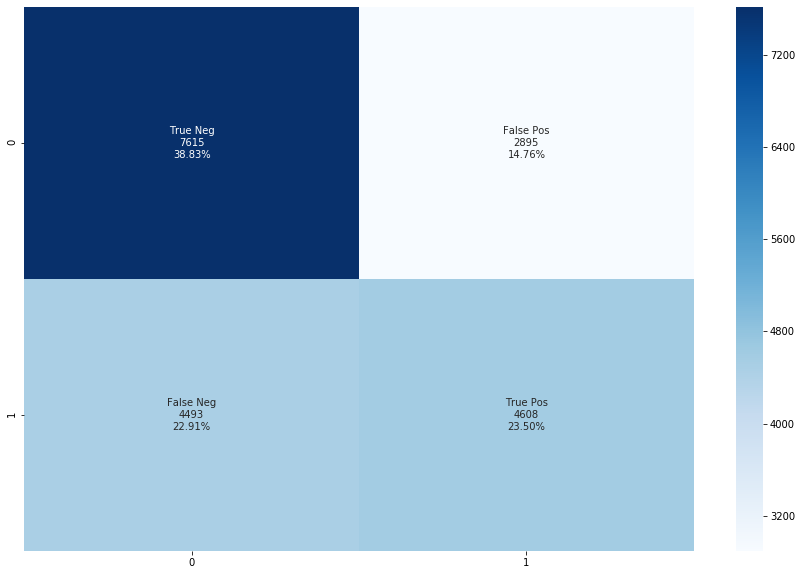

In [81]:
cf_matrix = confusion_matrix(y_test,y_pred_clf)

plt.figure(figsize=(15,10))
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in
                cf_matrix.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')
b, t = plt.ylim()
b += 0.5
t -= 0.5
plt.ylim(b, t)
plt.show()

# AUC-ROC Score and Chart

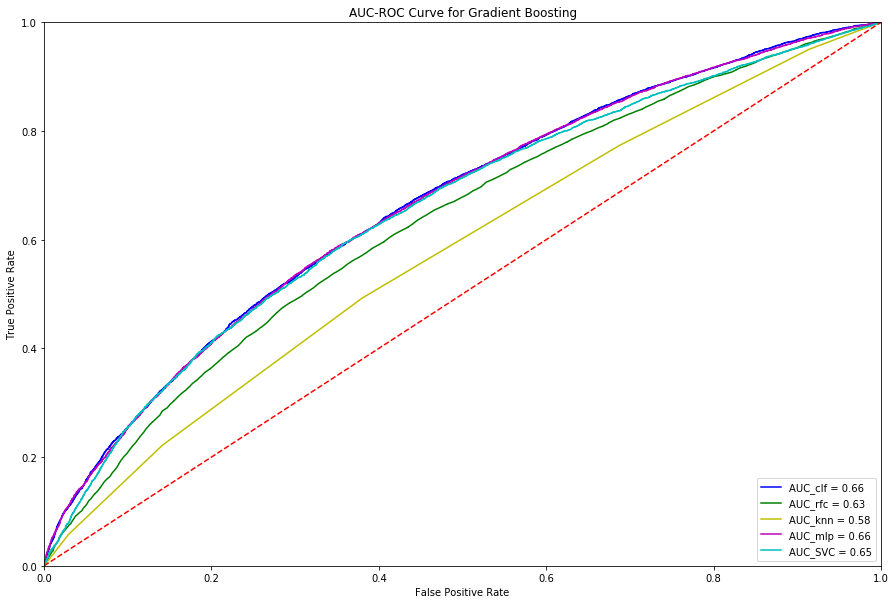

In [84]:
decision_scores = svm.decision_function(x_test)
fpr_svm, tpr_svm, threshold_svm = roc_curve(y_test, decision_scores, pos_label = 'Yes')

probs_clf = clf.predict_proba(x_test)
preds_clf = probs_clf[:,1]

probs_rfc = rfc.predict_proba(x_test)
preds_rfc = probs_rfc[:,1]

probs_knn = neighbors.predict_proba(x_test)
preds_knn = probs_knn[:,1]

probs_mlp = mlp.predict_proba(x_test)
preds_mlp = probs_mlp[:,1]

fpr_clf, tpr_clf, threshold_clf = metrics.roc_curve(y_test, preds_clf, pos_label='Yes')
roc_auc_clf = metrics.auc(fpr_clf, tpr_clf)

fpr_rfc, tpr_rfc, threshold_rfc = metrics.roc_curve(y_test, preds_rfc, pos_label='Yes')
roc_auc_rfc = metrics.auc(fpr_rfc, tpr_rfc)

fpr_knn, tpr_knn, threshold_knn = metrics.roc_curve(y_test, preds_knn, pos_label='Yes')
roc_auc_knn = metrics.auc(fpr_knn, tpr_knn)

fpr_mlp, tpr_mlp, threshold_mlp = metrics.roc_curve(y_test, preds_mlp, pos_label='Yes')
roc_auc_mlp = metrics.auc(fpr_mlp, tpr_mlp)

plt.figure(figsize=(15,10))
plt.title('AUC-ROC Curve for Gradient Boosting')
plt.plot(fpr_clf, tpr_clf, 'b', label = 'AUC_clf = %0.2f' % roc_auc_clf)
plt.plot(fpr_rfc, tpr_rfc, 'g', label = 'AUC_rfc = %0.2f' % roc_auc_rfc)
plt.plot(fpr_knn, tpr_knn, 'y', label = 'AUC_knn = %0.2f' % roc_auc_knn)
plt.plot(fpr_mlp, tpr_mlp, 'm', label = 'AUC_mlp = %0.2f' % roc_auc_mlp)
plt.plot(fpr_svm, tpr_svm, 'c', label = 'AUC_SVC = %0.2f' % roc_auc_score(y_test, decision_scores))
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# Shortcomings Of Model

* Poor metrics
* Data does not have much predictive power


# Steps To Improve

* Find more data